In [34]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


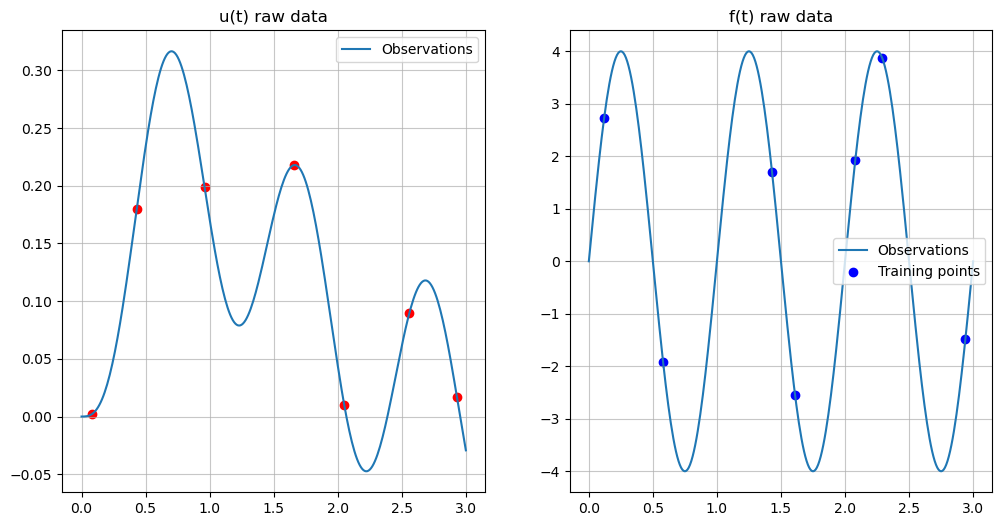

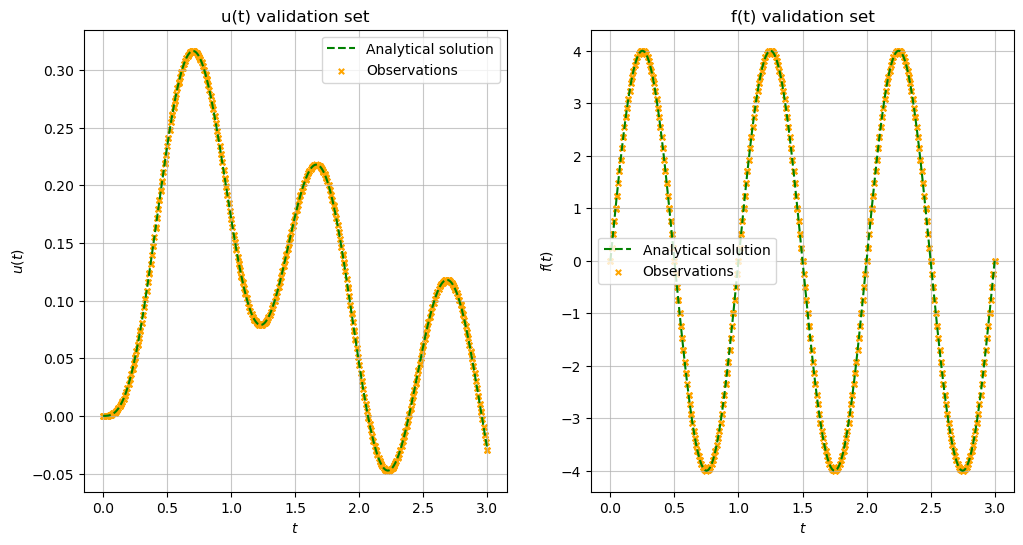

In [35]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model.set_training_data("damped_m1k2b1.csv",7,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1200)
model.plot_validation_set()


In [7]:
model.jitter = 1e-7
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 300, 10

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 300/300 [00:18<00:00, 16.52it/s]


     fun: 3.9523017406463623
     jac: array([-1.8300781 ,  0.07763672,  2.0166016 , -1.197815  ,  0.15005493],
      dtype=float32)
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 66
     nit: 9
  status: 2
 success: True
       x: array([0.41667248, 0.2900425 , 0.90562732, 1.42947805, 0.31923026])


In [ ]:
print(model.get_params())

[0.48909158 0.58601285 0.99895693 1.99258569 1.99875862]


In [ ]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}

In [ ]:
model.set_params(results["nf_n=9_melder_4000"][0])

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt


{'u': 5.770634743385017e-05, 'f': 0.2640121281147003}

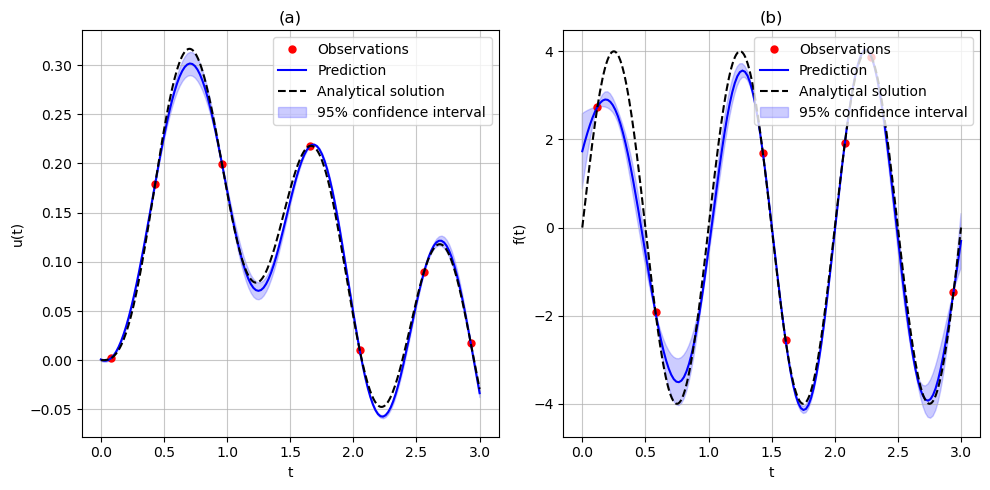

In [8]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.MSE
#print(model)

 /opt/homebrew/anaconda3/envs/bac/lib/python3.8/site-packages/GPy/core/__init__.py:80: FutureWarning:In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

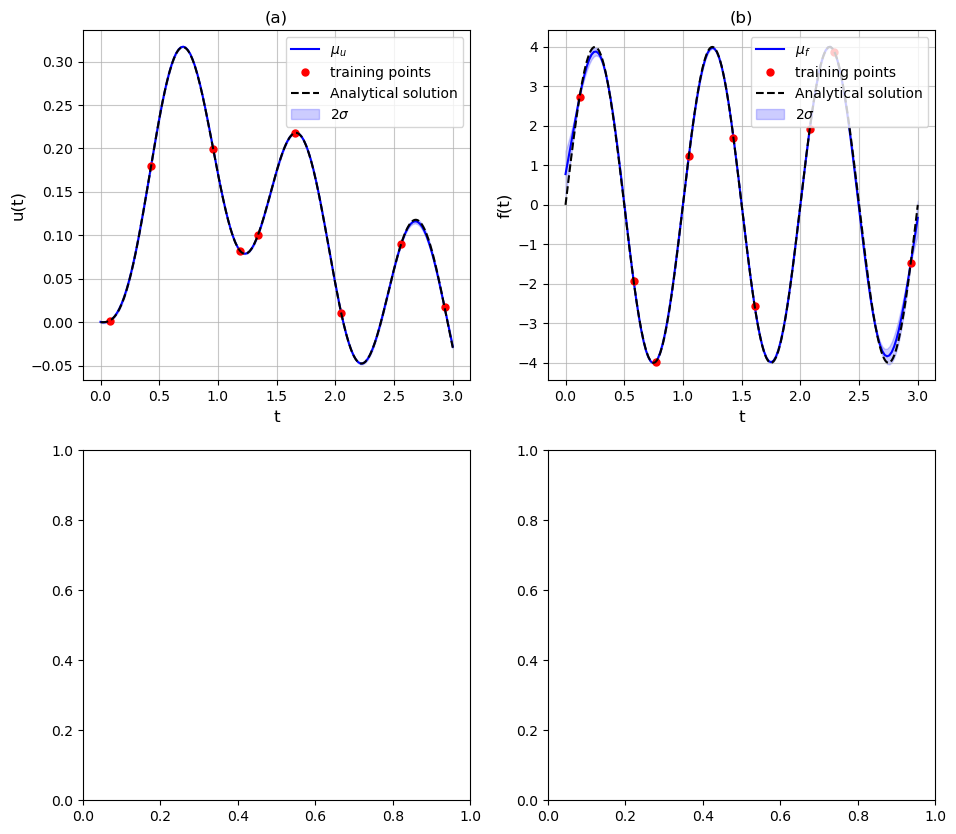

In [7]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


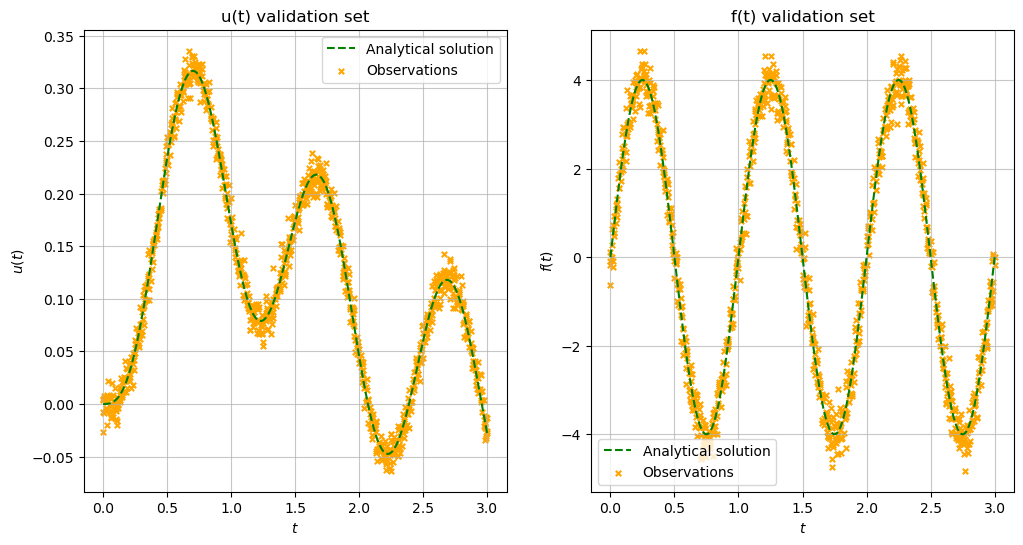

In [4]:
seeds_training = [50,38]
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model2.set_training_data("damped_m1k2b1.csv",9,[1e-4,1e-1],seeds_training)
model2.set_validation_data(1000)
model2.plot_validation_set()
#model2.plot_raw_data(Training_points=True)


In [5]:
n_iterations, n_threads = 800,12
model2.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial

model2.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)

  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 800/800 [00:49<00:00, 16.04it/s]


     fun: 3.55580997467041
     jac: array([-0.01412964,  0.03451538, -0.09310913, -0.00692177,  0.00606346],
      dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 96
     nit: 15
  status: 1
 success: True
       x: array([0.36351842, 0.25220956, 0.98003551, 1.71121584, 0.95718892])


-----------------------------------------------
GP with kernel: 
Training data: (9, 1)
Training targets: (18, 1)
Hyperparameters: {'l': 0.3637495072172969, 'sigma_f': 0.25222503662701135, 'm': 0.9810141060954948, 'b': 1.7230536964099161, 'k': 0.9650168023858514}
Log marginal likelihood: 3.555901527404785
Mean squared error: {'u': 0.00014305819058790803, 'f': 0.1539742797613144}
Relative l2 error: {'u': 0.07831216209045709, 'f': 0.1389638167723531}
-----------------------------------------------



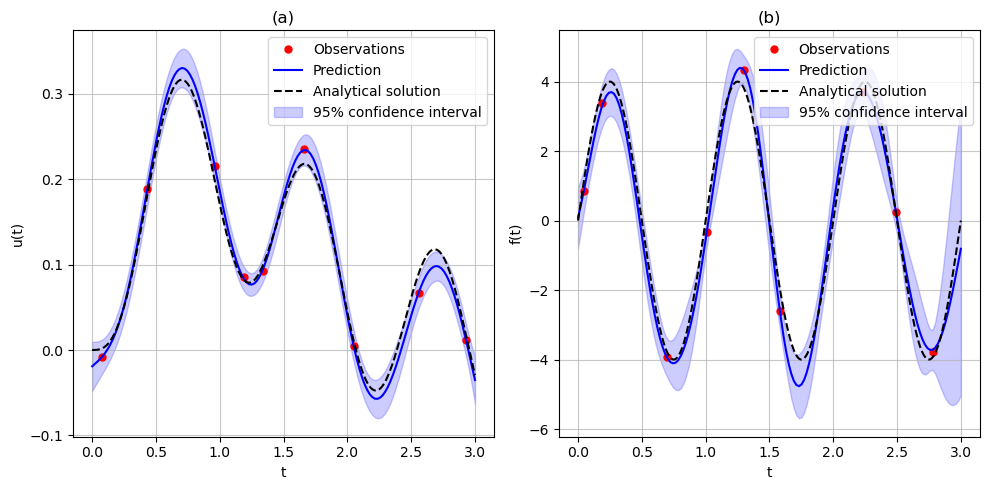

In [10]:


model2.predict_model(X_star)
model2.plot_prediction(X_star,"oscillator_with_noise.png","oscillator_noise.png")
model2.error()
print(model2)
#model2.plot_merged_1d_plots(X_star, "o",(11,10))

fun: 3.555784225463867  
     jac: array([-0.06851196,  0.01727295, -0.0453949 ,  0.00055313, -0.00218439],  
      dtype=float32) 
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'   
    nfev: 96   
     nit: 18   
  status: 1 
 success: True 
       x: array([0.36329879, 0.25175648, 0.9802112 , 1.71165971, 0.95101893]) 
{'u': 0.07846240055987475, 'f': 0.1390139924376683}   

 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


This is model with n =  3


100%|██████████| 500/500 [00:19<00:00, 25.21it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to b

Theta:  [  2.41126583   0.5246474   58.74604513 216.77710569 360.87930873] 
 Log marginal likelihood:  0.3825232982635498
-----------------------------------------------------------
This is model with n =  4


100%|██████████| 500/500 [00:14<00:00, 34.63it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.12337079 0.14213573 0.236159   0.10886897 2.38332203] 
 Log marginal likelihood:  4.217561721801758
-----------------------------------------------------------
This is model with n =  5


100%|██████████| 500/500 [00:16<00:00, 30.28it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: 

Theta:  [ 0.5161506   0.21096114  3.08999433  3.12350309 10.17572136] 
 Log marginal likelihood:  3.72518253326416
-----------------------------------------------------------
This is model with n =  6


100%|██████████| 500/500 [00:16<00:00, 30.24it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.39869693 0.18209818 1.55861227 3.26978559 0.1154284 ] 
 Log marginal likelihood:  4.984830379486084
-----------------------------------------------------------
This is model with n =  7


100%|██████████| 500/500 [00:14<00:00, 34.65it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.42233099 0.28189921 0.96799144 2.17228361 0.12361638] 
 Log marginal likelihood:  3.5482122898101807
-----------------------------------------------------------
This is model with n =  8


100%|██████████| 500/500 [00:14<00:00, 35.38it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:882: 

Theta:  [0.45401151 0.3507448  0.96817599 2.05316742 0.76558962] 
 Log marginal likelihood:  0.4283761978149414
-----------------------------------------------------------
This is model with n =  10


100%|██████████| 500/500 [00:12<00:00, 39.31it/s]
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:850: UserWarning:The balance properties of Sobol' points require n to b

Theta:  [0.48610357 0.60312074 0.99780191 1.99391814 2.00014816] 
 Log marginal likelihood:  -10.07580852508545
-----------------------------------------------------------
This is model with n =  15


100%|██████████| 500/500 [00:15<00:00, 33.08it/s]


Theta:  [0.45639781 0.36947987 1.00109457 2.00200683 2.00725764] 
 Log marginal likelihood:  -34.03542709350586
-----------------------------------------------------------


 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:543: RuntimeWarning:invalid value encountered in sqrt


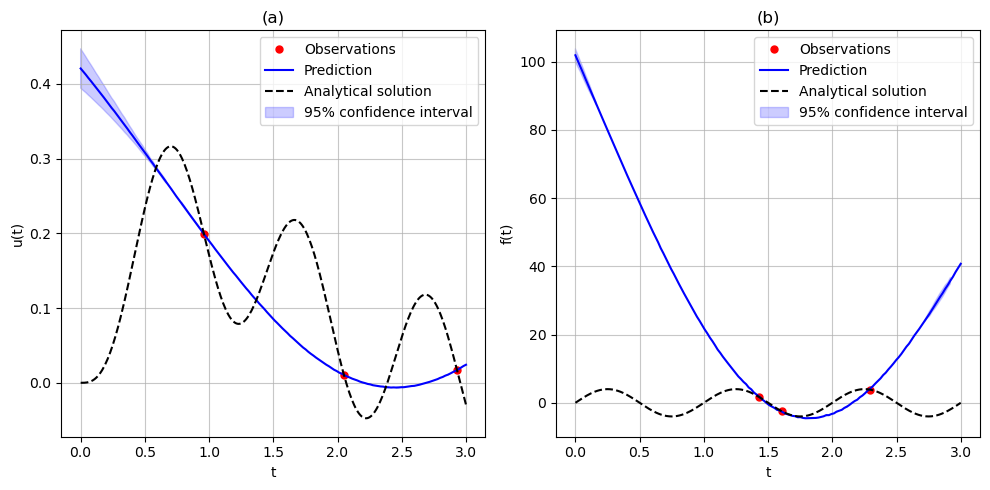

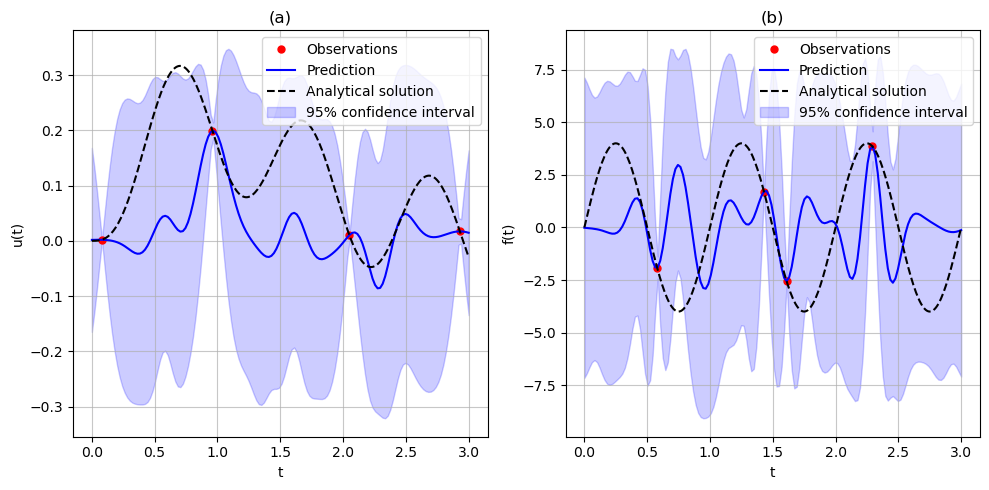

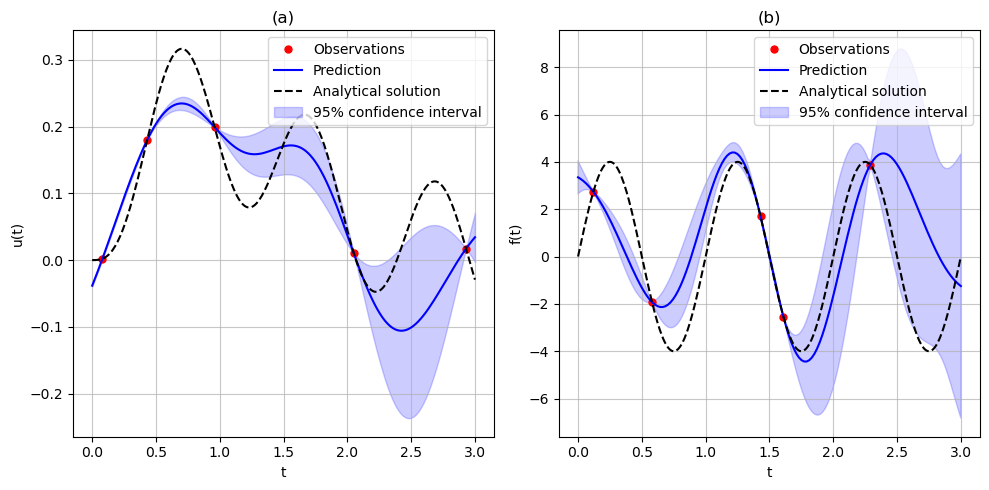

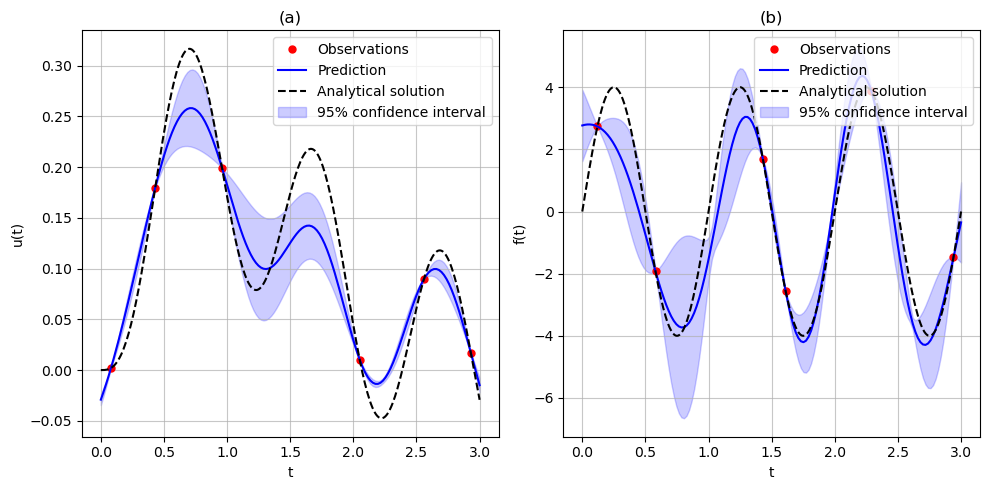

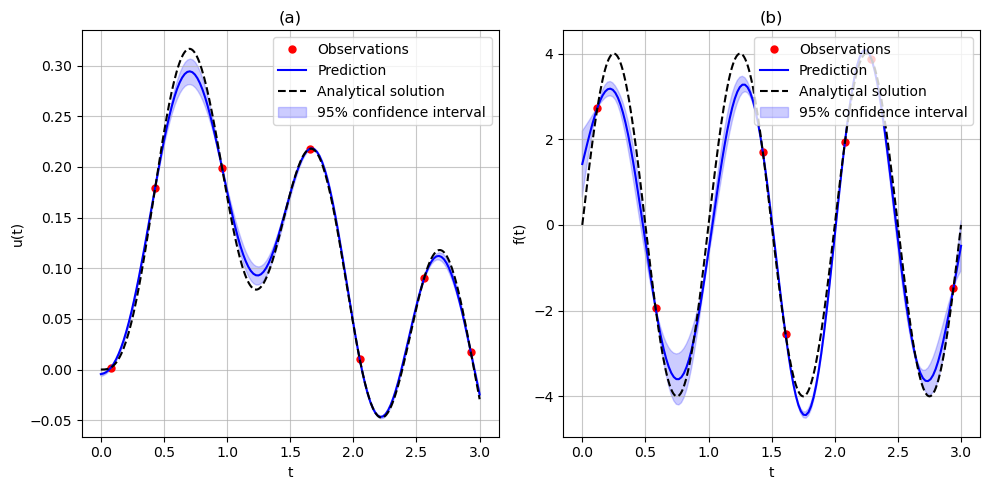

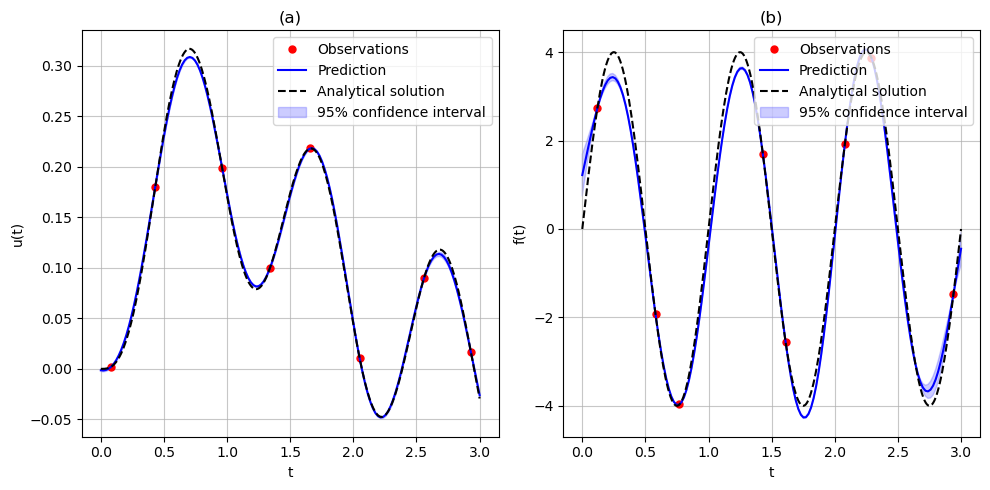

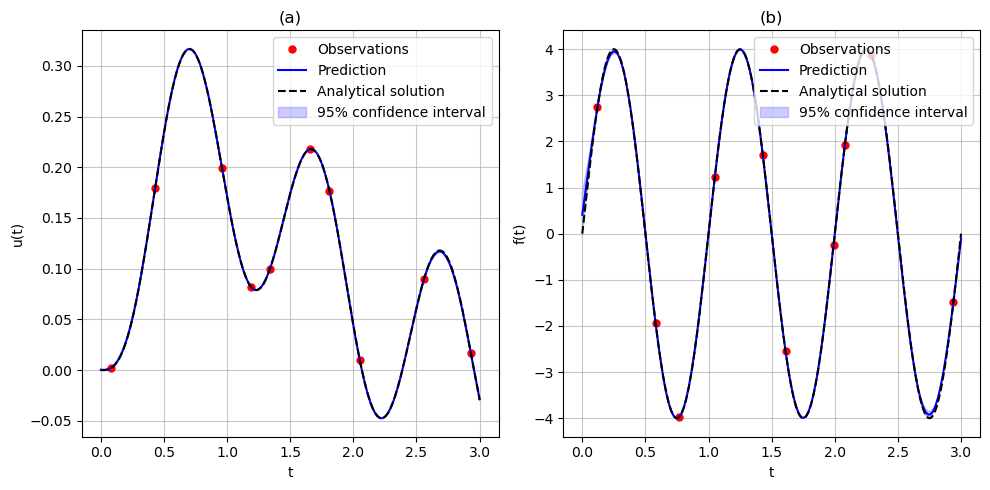

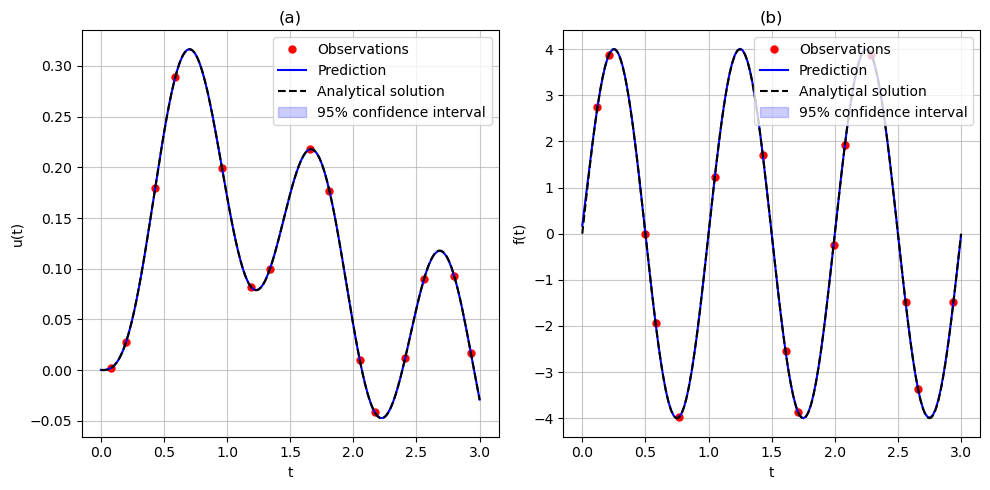

In [38]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 500
models = []
l_2_errors = []
n_training = [3,4,5,6,7,8,10,15]
for n in n_training:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
    modeln.set_training_data("damped_m1k2b1.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    #print(modeln)
    #print(model.rel_l2_error)
    models.append(modeln)
    l_2_errors.append(modeln.rel_l2_error)
    print("-----------------------------------------------------------")

No handles with labels found to put in legend.


[{'u': 0.9482828147846983, 'f': 13.805898688164428}
 {'u': 0.869062355536548, 'f': 1.091636608295205}
 {'u': 0.48940733644339435, 'f': 0.7909556002052642}
 {'u': 0.23351856151027534, 'f': 0.32945725341817983}
 {'u': 0.05566940947080783, 'f': 0.17203688999675454}
 {'u': 0.022177463809932876, 'f': 0.1077723358639698}
 {'u': 0.00220292670366637, 'f': 0.018493696594870775}
 {'u': 0.0007790234176116105, 'f': 0.006500901062506704}]


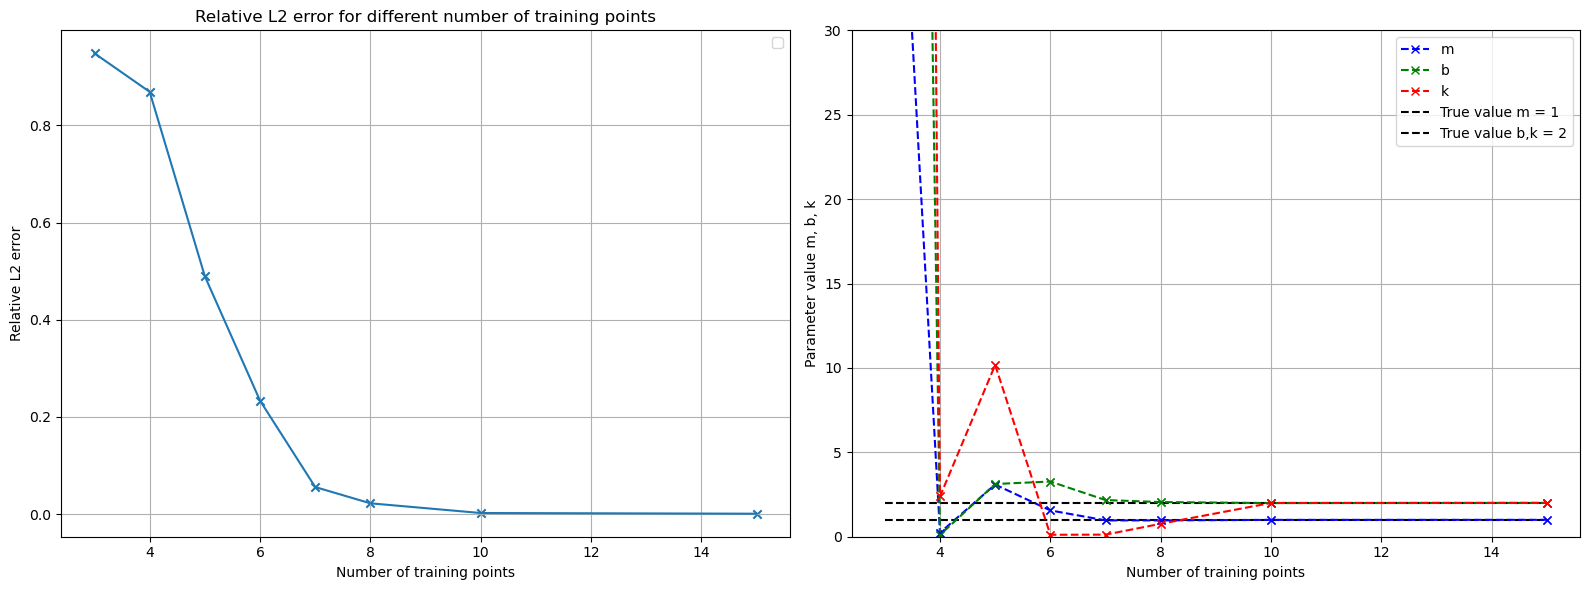

In [63]:
thetas = [x.params for x in models]
l_2_errors = np.array(l_2_errors)
print(l_2_errors)
l2_u = [x['u'] for x in l_2_errors]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(n_training,l2_u)
ax[0].scatter(n_training,l2_u,marker="x")
ax[0].set_xlabel("Number of training points")
ax[0].grid()
ax[0].set_ylabel("Relative L2 error")
ax[0].set_title("Relative L2 error for different number of training points")
ax[0].legend()

ax[1].hlines(1,3,15,linestyles="dashed",label="True value m = 1",colors="black")
ax[1].hlines(2,3,15,linestyles="dashed",label="True value b,k = 2",colors="black")
ax[1].plot(n_training,[x['m'] for x in thetas],label="m",marker="x",linestyle="--",alpha=1,color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],label="b",marker="x",linestyle="--",alpha=1,color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],label="k",marker="x",linestyle="--",alpha=1,color= "red")

ax[1].plot(n_training,[x['m'] for x in thetas],marker="x",linestyle="None",color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],marker="x",linestyle="None",color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],marker="x",linestyle="None",color= "red")
ax[1].legend()
ax[1].set_ylim(0,30)
ax[1].set_xlabel("Number of training points")
ax[1].grid()
ax[1].set_ylabel("Parameter value m, b, k")
plt.tight_layout()
plt.savefig("l2_error.png")

